In [1]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.impute import KNNImputer

In [5]:
external_df = pd.read_csv('External_Cibil_Dataset.csv')
internal_df = pd.read_csv('Internal_Bank_Dataset.csv')

In [6]:
train = pd.merge(external_df, internal_df, on='PROSPECTID')

In [7]:
train.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32


In [8]:
test = pd.read_csv('Unseen_Dataset.csv')

In [9]:
test.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL


In [10]:
print(external_df.shape)
print(internal_df.shape)
print(train.shape)
print(test.shape)

(51336, 62)
(51336, 26)
(51336, 87)
(100, 42)


In [11]:
train.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [12]:
test.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS',
       'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'],
      dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [14]:
train.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


1. Find Missing Value
2. Explore about Numerical features
3. Explore about Categorical features
4. Finding relationship between featues

In [15]:
train.replace(-99999, np.nan, inplace=True)

In [16]:
pd.set_option('display.max_rows', 100) 
train.isnull().sum()

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                  12890
max_deliq_12mts                 10832
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level

In [17]:
[features for features in train.columns if train[features].isnull().sum()>0]

['time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct',
 'Age_Oldest_TL',
 'Age_Newest_TL']

In [18]:
train['time_since_recent_payment'].describe()

count    47045.000000
mean       249.463599
std        467.777931
min          2.000000
25%         52.000000
50%         74.000000
75%        195.000000
max       6065.000000
Name: time_since_recent_payment, dtype: float64

In [19]:
train['time_since_recent_payment'].mode().iloc[0]

np.float64(51.0)

In [20]:
train.shape

(51336, 87)

In [21]:
train.isnull().sum()

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                  12890
max_deliq_12mts                 10832
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level

<Axes: >

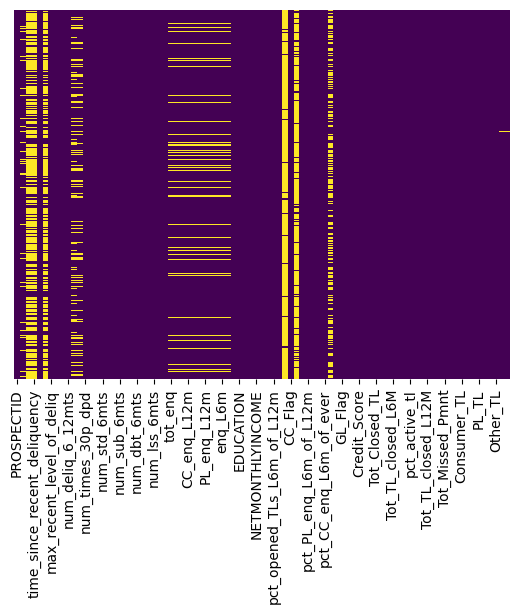

In [22]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [23]:
train_n = train.copy()

In [24]:
cols_for_knn = [
    'time_since_recent_payment',
    'num_times_delinquent',
    'num_deliq_6mts',
    'num_deliq_12mts',
    'Unsecured_TL',
    'Secured_TL'
]

imputer = KNNImputer(n_neighbors=5)
train_n[cols_for_knn] = imputer.fit_transform(train_n[cols_for_knn])

In [25]:
train_n.isnull().sum()

PROSPECTID                          0
time_since_recent_payment           0
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                  12890
max_deliq_12mts                 10832
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level

In [26]:
train_n['max_deliq_6mts'].describe()

count    38446.000000
mean         4.841128
std         28.628229
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        900.000000
Name: max_deliq_6mts, dtype: float64

In [27]:
train_n['max_deliq_12mts'].describe()

count    40504.000000
mean         9.206498
std         39.463153
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        900.000000
Name: max_deliq_12mts, dtype: float64

In [28]:
train_n[train_n['max_deliq_6mts'].isnull()]

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,35.0,15.0,11.0,29.0,29,0.0,0.0,0,...,0,0,1,0,4,1.0,4.0,0,72.0,18.0
3,4,264.8,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0.0,1.0,1,5.0,5.0
4,5,583.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,3.0,0.0,2,131.0,32.0
6,7,49.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,3,0,0,3.0,0.0,0,17.0,5.0
9,10,39.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,1.0,1.0,2,66.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51322,51323,48.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,1.0,0.0,0,10.0,10.0
51327,51328,563.0,27.0,27.0,1.0,26.0,26,0.0,0.0,0,...,0,0,0,0,0,1.0,0.0,0,48.0,48.0
51328,51329,264.8,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0.0,1.0,1,2.0,2.0
51329,51330,685.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,4,0,0,4.0,0.0,0,32.0,24.0


In [29]:
train_n['max_deliq_12mts'].mode().iloc[0]
train_n['max_deliq_6mts'].mode().iloc[0]

np.float64(0.0)

In [30]:
train_n['max_deliq_6mts'] = train_n['max_deliq_6mts'].fillna(0)

In [31]:
train_n['max_deliq_12mts'] = train_n['max_deliq_12mts'].fillna(0)

In [32]:
train_n.head(15)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,35.0,15.0,11.0,29.0,29,0.0,0.0,0,...,0,0,1,0,4,1.0,4.0,0,72.0,18.0
1,2,47.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,1,0,0,0,0.0,1.0,0,7.0,7.0
2,3,302.0,11.0,3.0,9.0,25.0,25,1.0,9.0,8,...,0,6,1,0,0,2.0,6.0,0,47.0,2.0
3,4,264.8,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0.0,1.0,1,5.0,5.0
4,5,583.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,3.0,0.0,2,131.0,32.0
5,6,245.0,27.0,18.0,14.0,300.0,270,0.0,0.0,0,...,0,0,2,0,0,6.0,0.0,0,150.0,17.0
6,7,49.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,3,0,0,3.0,0.0,0,17.0,5.0
7,8,74.0,23.0,12.0,3.0,164.0,133,0.0,0.0,0,...,0,0,0,0,0,6.0,0.0,5,36.0,8.0
8,9,424.0,7.0,4.0,3.0,99.0,38,2.0,3.0,1,...,0,0,0,0,0,1.0,0.0,0,16.0,16.0
9,10,39.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,1.0,1.0,2,66.0,39.0


In [33]:
train_n.isnull().sum()

PROSPECTID                          0
time_since_recent_payment           0
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                      0
max_deliq_12mts                     0
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level

In [34]:
train[['tot_enq','CC_enq','CC_enq_L6m','CC_enq_L12m','PL_enq','PL_enq_L6m','PL_enq_L12m','time_since_recent_enq','enq_L12m','enq_L6m','enq_L3m']].describe()

,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m
count,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000,45015.000000
mean,5.291036,0.467266,0.158903,0.260846,1.135177,0.506720,0.757659,260.051649,3.011107,1.995290,1.241719
std,6.178414,1.666951,0.673070,0.998968,2.330629,1.353613,1.769592,462.042665,4.218634,3.121818,2.063165
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,2.000000,1.000000,1.000000
75%,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,295.000000,4.000000,3.000000,2.000000
max,176.000000,42.000000,17.000000,24.000000,46.000000,44.000000,44.000000,4768.000000,87.000000,66.000000,42.000000


In [35]:
train_n.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,35.0,15.0,11.0,29.0,29,0.0,0.0,0,...,0,0,1,0,4,1.0,4.0,0,72.0,18.0
1,2,47.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,1,0,0,0,0.0,1.0,0,7.0,7.0
2,3,302.0,11.0,3.0,9.0,25.0,25,1.0,9.0,8,...,0,6,1,0,0,2.0,6.0,0,47.0,2.0
3,4,264.8,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0.0,1.0,1,5.0,5.0
4,5,583.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,...,0,0,0,0,0,3.0,0.0,2,131.0,32.0


In [36]:
train[['tot_enq','CC_enq','CC_enq_L6m','CC_enq_L12m','PL_enq','PL_enq_L6m','PL_enq_L12m','time_since_recent_enq','enq_L12m','enq_L6m','enq_L3m']].mode()

,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [37]:
count_cols = [
    'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m',
    'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
    'enq_L12m', 'enq_L6m', 'enq_L3m'
]

# Fill count columns with 0
for col in count_cols:
    train_n[col] = train_n[col].fillna(0)

# Fill 'time_since_recent_enq' with median
train_n['time_since_recent_enq'] = train_n['time_since_recent_enq'].fillna(train_n['time_since_recent_enq'].median())

In [38]:
train_n.isnull().sum()

PROSPECTID                          0
time_since_recent_payment           0
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                      0
max_deliq_12mts                     0
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level

In [39]:
train_n[['CC_utilization' ,'PL_utilization']].describe()

,CC_utilization,PL_utilization
count,3700.000000,6901.000000
mean,0.628344,0.751838
std,1.237861,0.253933
min,0.000000,0.000000
25%,0.186500,0.641000
50%,0.738500,0.835000
75%,0.964000,0.944000
max,71.059000,1.708000


In [40]:
Q1 = train_n['max_unsec_exposure_inPct'].quantile(0.25)
Q3 = train_n['max_unsec_exposure_inPct'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train_n[(train_n['max_unsec_exposure_inPct'] < lower_bound) | 
                   (train_n['max_unsec_exposure_inPct'] > upper_bound)]

print(f"Outliers found: {len(outliers)}")

Outliers found: 2936


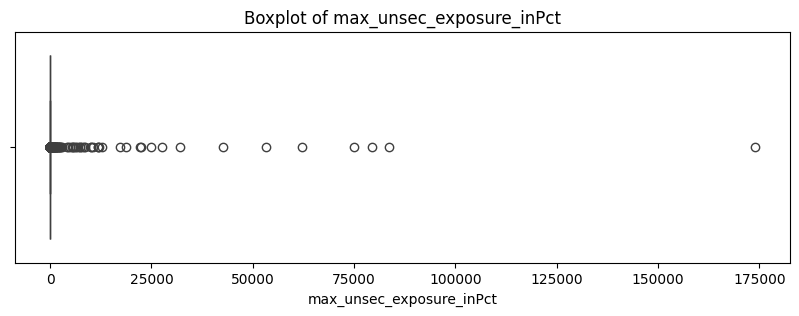

In [41]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=train_n['max_unsec_exposure_inPct'])
plt.title("Boxplot of max_unsec_exposure_inPct")
plt.show()

In [42]:
train_n = train_n[~((train_n['max_unsec_exposure_inPct'] < lower_bound) |
                    (train_n['max_unsec_exposure_inPct'] > upper_bound))]

In [43]:
train_n['max_unsec_exposure_inPct'].describe()

count    25222.000000
mean         2.651695
std          2.780953
min          0.000000
25%          0.705000
50%          1.500000
75%          3.690000
max         12.037000
Name: max_unsec_exposure_inPct, dtype: float64

In [44]:
train_n['max_unsec_exposure_inPct'] = train_n['max_unsec_exposure_inPct'].fillna(train_n['max_unsec_exposure_inPct'].median())

In [45]:
pd.set_option('display.max_columns', None)
train_n.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
1,2,47.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,1.0,0.0,0.0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,NaN,0,NaN,0,0.0,0.0,0.000,0.0,0.86,0,0,ConsumerLoan,ConsumerLoan,685,P2,1,0,1,0,0,0.000,0.000,1.000,0.000,1,0,1.000,0.000,0,0,0,1,0,0,0,0.0,1.0,0,7.0,7.0
3,4,264.8,NaN,NaN,0.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,Married,SSC,34,M,10000,246,1.000,1.0,0.990,NaN,0,NaN,0,0.0,0.0,0.000,0.0,9.90,0,0,others,others,673,P2,1,0,1,1,0,1.000,0.000,1.000,0.000,1,0,1.000,0.000,1,0,0,0,0,0,0,0.0,1.0,1,5.0,5.0
4,5,583.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3951.0,0.0,0.0,0.0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,NaN,0,NaN,0,0.0,0.0,0.000,0.0,1.50,0,0,AL,AL,753,P1,3,2,1,0,0,0.000,0.000,0.333,0.667,0,0,0.000,0.000,0,1,0,0,0,0,0,3.0,0.0,2,131.0,32.0
5,6,245.0,27.0,18.0,14.0,300.0,270,0.0,0.0,0,0.0,0.0,13,11,5,0,2,3,0,1,0,0,0,0,0,0,26,15.0,2.0,0.0,1.0,7.0,3.0,3.0,7.0,6.0,5.0,4.0,Married,12TH,35,M,0,154,0.167,0.0,0.000,NaN,0,NaN,0,1.0,0.0,0.429,0.0,1.50,1,0,ConsumerLoan,PL,668,P3,6,5,1,0,0,0.000,0.000,0.167,0.833,0,1,0.000,0.167,0,4,0,0,2,0,0,6.0,0.0,0,150.0,17.0
6,7,49.0,NaN,NaN,0.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0,25,11,20,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,Married,SSC,35,M,30000,81,0.667,0.5,0.998,NaN,0,NaN,0,0.0,0.0,0.000,0.0,1.50,1,0,others,others,703,P1,3,1,2,1,1,0.333,0.333,0.667,0.333,2,1,0.667,0.333,1,0,0,0,3,0,0,3.0,0.0,0,17.0,5.0


In [46]:
train_n[['pct_currentBal_all_TL','Age_Oldest_TL', 'Age_Newest_TL']].describe()

,pct_currentBal_all_TL,Age_Oldest_TL,Age_Newest_TL
count,48328.000000,48360.000000,48360.000000
mean,0.840182,43.859512,16.193859
std,37.930326,40.665098,22.413856
min,0.000000,0.000000,0.000000
25%,0.025000,13.000000,4.000000
50%,0.597000,31.000000,8.000000
75%,0.882000,62.000000,18.000000
max,6327.500000,392.000000,392.000000


In [47]:
Q1 = train_n['pct_currentBal_all_TL'].quantile(0.25)
Q3 = train_n['pct_currentBal_all_TL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train_n[(train_n['pct_currentBal_all_TL'] < lower_bound) | 
                   (train_n['pct_currentBal_all_TL'] > upper_bound)]

print(f"Outliers found: {len(outliers)}")

Outliers found: 46


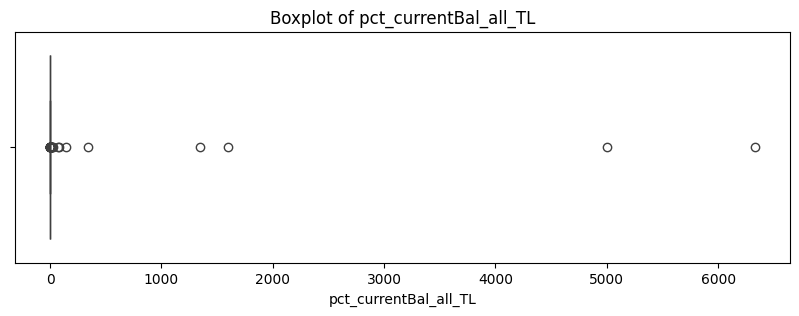

In [48]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=train_n['pct_currentBal_all_TL'])
plt.title("Boxplot of pct_currentBal_all_TL")
plt.show()

In [49]:
median_val = train_n['pct_currentBal_all_TL'].median()

train_n['pct_currentBal_all_TL'] = train_n['pct_currentBal_all_TL'].apply(
    lambda x: median_val if x < lower_bound or x > upper_bound else x
)

In [50]:
train_n['pct_currentBal_all_TL'] = train_n['pct_currentBal_all_TL'].fillna(median_val)

In [51]:
train_n['pct_currentBal_all_TL'].isnull().sum()

np.int64(0)

In [52]:
train_n['Age_Oldest_TL'] = train_n['Age_Oldest_TL'].fillna(train_n['Age_Oldest_TL'].median())

In [53]:
train_n['Age_Newest_TL'] = train_n['Age_Newest_TL'].fillna(train_n['Age_Newest_TL'].median())

In [54]:
train_n = train_n.drop(columns=['time_since_first_deliquency','time_since_recent_deliquency', 'max_delinquency_level', 'CC_utilization', 'PL_utilization','max_unsec_exposure_inPct'])

## Feature Co relation

In [55]:
train_n.corr(numeric_only = True)

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
PROSPECTID,1.000000,-0.002200,-0.000774,0.006207,0.000790,-0.000630,-0.001477,0.006735,0.005200,-0.003524,-0.004227,-0.000569,-0.004093,-0.004633,0.002763,-0.004860,-0.005355,0.007244,0.002719,0.003466,-0.001778,-0.004035,-0.005285,0.005551,0.004206,0.006014,0.008086,0.008736,0.001258,0.003889,0.000471,-0.005461,0.004397,0.008015,0.008864,-0.002629,-0.001892,-0.000480,-0.006449,0.001253,-0.007748,0.003057,-0.002347,0.002408,0.008063,0.001466,0.007590,0.003699,0.000535,-0.007984,-0.000005,0.001844,-0.005155,-0.004462,0.002861,-0.002684,0.006603,-0.006449,0.006449,-0.004961,-0.002914,-0.001790,0.002909,-0.003281,-0.003748,0.005189,0.004189,-0.001290,-0.001394,-0.001359,-0.001117,0.002437,0.000436,-0.001059,0.003134
time_since_recent_payment,-0.002200,1.000000,-0.047164,0.002637,-0.084000,-0.097095,-0.085771,-0.024793,-0.035273,-0.003509,0.012786,-0.071666,-0.103829,-0.097793,0.013559,0.001869,0.005782,0.016845,0.017861,0.019739,0.018412,0.015593,0.015489,0.014735,-0.181627,-0.081229,-0.070815,-0.081106,-0.122515,-0.096681,-0.116367,0.254839,-0.174525,-0.132204,-0.093066,0.114365,-0.022527,0.058685,-0.302695,-0.204546,-0.296591,-0.078249,-0.100428,-0.116739,-0.081154,-0.111003,-0.075573,0.018963,-0.030691,0.106022,-0.121620,-0.044220,-0.276182,-0.200276,-0.162600,-0.177816,-0.142214,-0.302695,0.302695,-0.260710,-0.168827,-0.317054,-0.146809,-0.077909,-0.034913,-0.073370,-0.192534,-0.025653,-0.027755,-0.076875,-0.043150,-0.203377,-0.081043,0.310918,0.695281
num_times_delinquent,-0.000774,-0.047164,1.000000,0.440232,0.510749,0.644341,0.601421,0.357451,0.426349,0.853106,0.716892,0.114818,0.079604,0.088920,0.039202,0.009640,0.013263,0.015671,-0.004728,-0.000759,0.024553,0.019717,0.020390,0.374183,0.173927,0.083427,0.020352,0.033798,0.060585,0.007163,0.013903,0.008053,0.048781,0.038267,0.036397,0.068254,0.063385,0.039515,-0.131729,-0.024929,0.003874,0.069056,0.037284,0.003611,0.016355,-0.012697,0.001043,0.141694,0.090339,-0.073121,0.297124,0.290543,0.166024,0.009807,0.071589,-0.118134,-0.021593,-0.131729,0.131729,0.032084,0.140164,-0.181603,0.007710,0.090993,0.205572,0.079427,0.025549,0.262610,0.096116,0.046568,0.296340,0.078422,0.130497,0.213759,-0.013252
max_recent_level_of_deliq,0.006207,0.002637,0.440232,1.000000,0.165218,0.210312,0.197332,0.373006,0.496642,0.517651,0.566833,0.084253,0.050083,0.060489,0.091117,0.032165,0.032974,0.063085,-0.003271,0.011503,0.047604,0.037393,0.039126,0.893072,0.078686,0.038271,0.002648,0.007172,0.030025,0.003043,0.006339,0.019976,0.018379,0.017654,0.020893,0.061017,0.040406,0.024961,-0.107125,-0.018454,-0.002522,0.026911,0.019043,-0.006207,0.001022,-0.013459,-0.007624,0.104198,0.040479,-0.073718,0.148714,0.147885,0.076228,0.003620,0.028213,-0.077893,-0.022204,-0.107125,0.107125,0.012479,0.067175,-0.121862,-0.001050,0.056598,0.088975,0.038411,-0.002256,0.126894,0.042744,0.023902,0.150386,0.034726,0.096075,0.178896,0.025367
num_deliq_6mts,0.000790,-0.08400

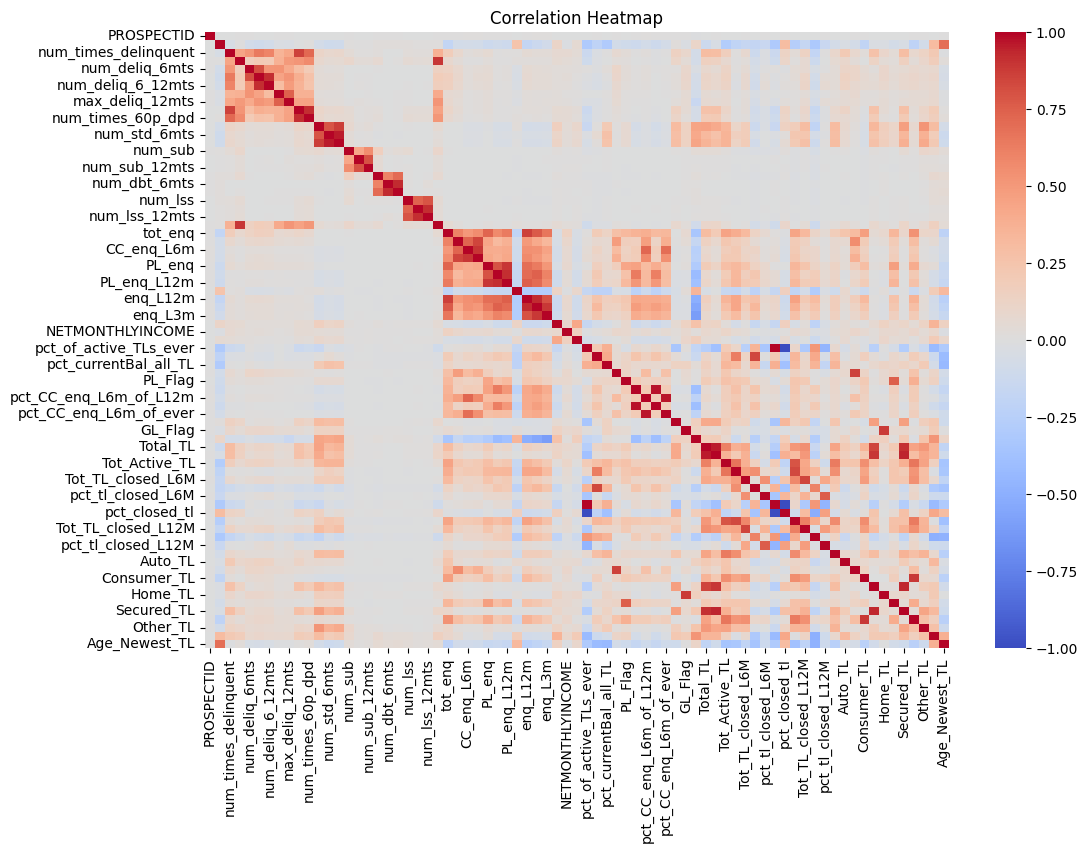

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train_n.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [57]:
train_n.head()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
1,2,47.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,1.0,0.0,0.0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2,1,0,1,0,0,0.000,0.000,1.000,0.000,1,0,1.000,0.000,0,0,0,1,0,0,0,0.0,1.0,0,7.0,7.0
3,4,264.8,0.0,0,0.0,0.0,0,0.0,0.0,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,Married,SSC,34,M,10000,246,1.000,1.0,0.990,0,0,0.0,0.0,0.000,0.0,0,0,others,others,673,P2,1,0,1,1,0,1.000,0.000,1.000,0.000,1,0,1.000,0.000,1,0,0,0,0,0,0,0.0,1.0,1,5.0,5.0
4,5,583.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3951.0,0.0,0.0,0.0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1,3,2,1,0,0,0.000,0.000,0.333,0.667,0,0,0.000,0.000,0,1,0,0,0,0,0,3.0,0.0,2,131.0,32.0
5,6,245.0,14.0,270,0.0,0.0,0,0.0,0.0,13,11,5,0,2,3,0,1,0,0,0,0,0,0,26,15.0,2.0,0.0,1.0,7.0,3.0,3.0,7.0,6.0,5.0,4.0,Married,12TH,35,M,0,154,0.167,0.0,0.000,0,0,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3,6,5,1,0,0,0.000,0.000,0.167,0.833,0,1,0.000,0.167,0,4,0,0,2,0,0,6.0,0.0,0,150.0,17.0
6,7,49.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,25,11,20,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,Married,SSC,35,M,30000,81,0.667,0.5,0.998,0,0,0.0,0.0,0.000,0.0,1,0,others,others,703,P1,3,1,2,1,1,0.333,0.333,0.667,0.333,2,1,0.667,0.333,1,0,0,0,3,0,0,3.0,0.0,0,17.0,5.0


In [58]:
corr_matrix = train_n.corr(numeric_only=True)
target_corr = corr_matrix["Credit_Score"].sort_values(ascending=False)
print(target_corr)

Credit_Score                  1.000000
Age_Oldest_TL                 0.520070
num_std_12mts                 0.443775
num_std                       0.439646
num_std_6mts                  0.414798
time_since_recent_enq         0.347941
AGE                           0.259662
Other_TL                      0.243591
Secured_TL                    0.213332
Tot_Closed_TL                 0.191153
Total_TL                      0.183913
pct_closed_tl                 0.183226
Time_With_Curr_Empr           0.168268
HL_Flag                       0.159319
Home_TL                       0.156309
Auto_TL                       0.147635
GL_Flag                       0.138957
Gold_TL                       0.120825
Age_Newest_TL                 0.116277
time_since_recent_payment     0.106022
Tot_TL_closed_L12M            0.079344
Tot_Active_TL                 0.071232
Tot_Missed_Pmnt               0.055281
num_sub                       0.043915
pct_currentBal_all_TL         0.038184
Tot_TL_closed_L6M        

## Feature Extraction

In [59]:
train_n.columns

Index(['PROSPECTID', 'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_Flag',
       'PL_Flag', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag',
       'GL_F

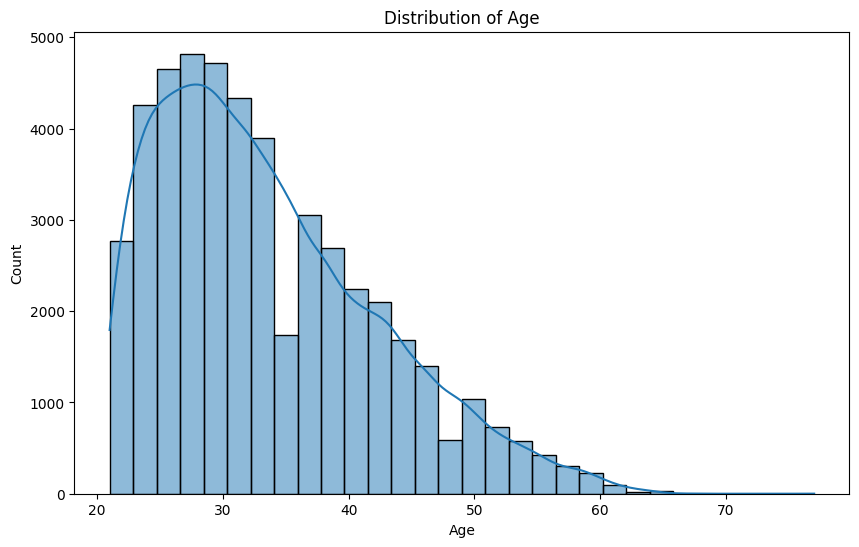

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(train_n['AGE'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Distribution of Age
Age Group 26-35 taking more loans

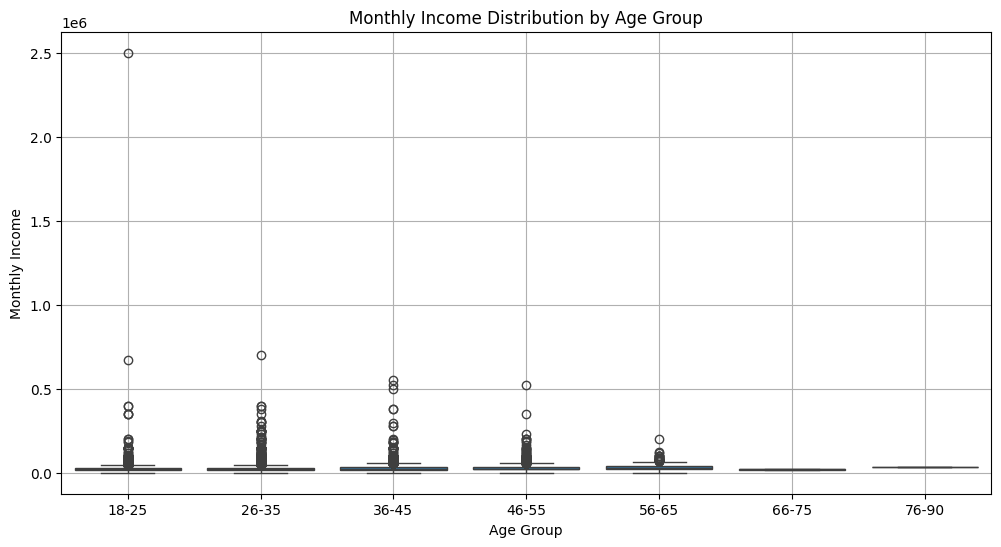

In [61]:
# Create Age Groups
train_n['Age_Group'] = pd.cut(train_n['AGE'], bins=[18, 25, 35, 45, 55, 65, 75, 90],
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-90'])

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_n, x='Age_Group', y='NETMONTHLYINCOME')
plt.title("Monthly Income Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Monthly Income")
plt.grid(True)
plt.show()

In [62]:
train_n['NETMONTHLYINCOME'].max()

np.int64(2500000)

In [63]:
train_n['NETMONTHLYINCOME'] = train_n['NETMONTHLYINCOME'].replace(train_n['NETMONTHLYINCOME'].max(), train_n['NETMONTHLYINCOME'].median())

In [64]:
train_n['NETMONTHLYINCOME'].max()

np.int64(700000)

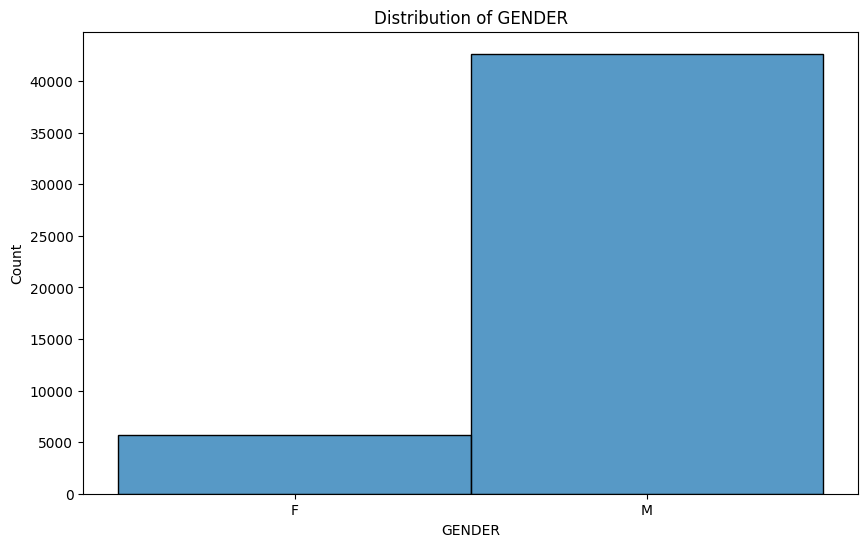

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'GENDER', data=train_n)
plt.title("Distribution of GENDER")
plt.xlabel("GENDER")
plt.ylabel("Count")
plt.show()

### Distibution of Gender

Male (M) applicants are much higher in count compared to Female (F) applicants

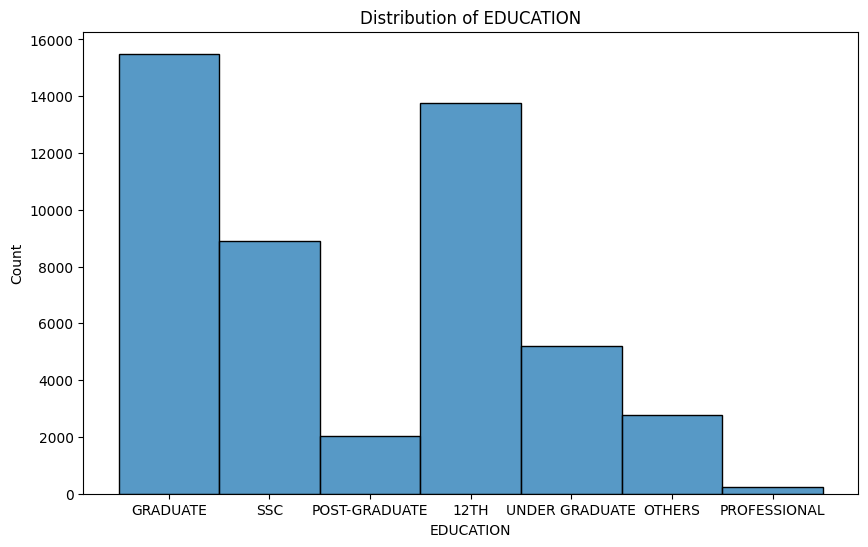

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'EDUCATION', data=train_n)
plt.title("Distribution of EDUCATION")
plt.xlabel("EDUCATION")
plt.ylabel("Count")
plt.show()

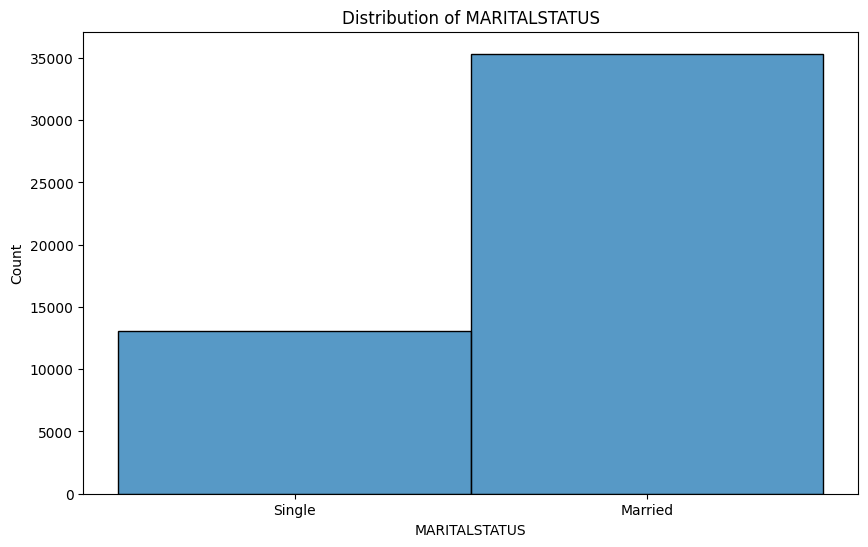

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'MARITALSTATUS', data=train_n)
plt.title("Distribution of MARITALSTATUS")
plt.xlabel("MARITALSTATUS")
plt.ylabel("Count")
plt.show()

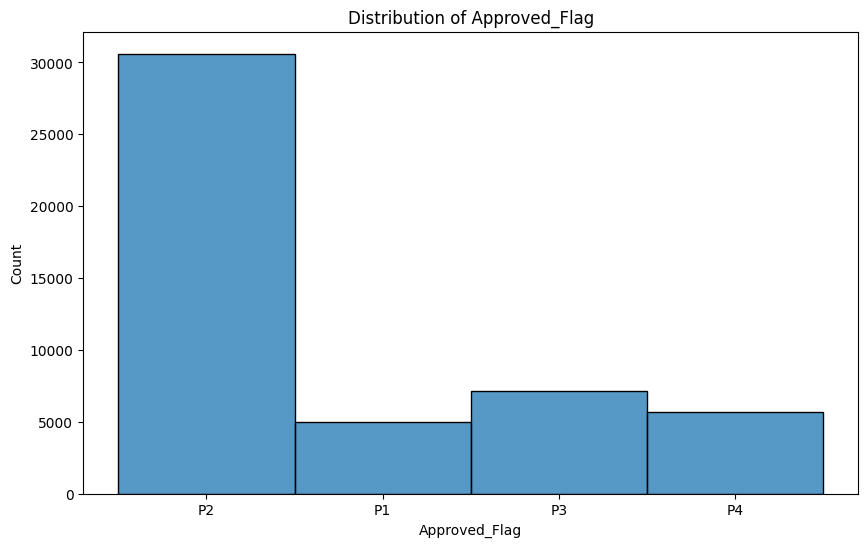

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Approved_Flag', data=train_n)
plt.title("Distribution of Approved_Flag")
plt.xlabel("Approved_Flag")
plt.ylabel("Count")
plt.show()

### Approved_Flag
- P1 - Low Risk
- P2 - Low to Medium Risk
- P3 - Medium Risk
- P4 - High Risk

#### VIF Text for Numeric Values

- Used to detect multicollinearity in regression analysis
- Multicollinearity: When independent variables are too similar to each other, the model struggles to know which one actually matters
- VIF = 1 → No correlation with other predictors (good)
- 1 < VIF < 5 → Moderate correlation (okay).
- VIF > 5 (or 10) → High multicollinearity (problematic → consider removing that variable).

In [69]:
!pip install statsmodels


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
numeric_cols = train_n.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Optionally remove ID column (not useful for regression)
if 'PROSPECTID' in numeric_cols:
    numeric_cols.remove('PROSPECTID')

# Subset only numeric predictors
X = train_n[numeric_cols]

# Add constant for intercept
X_const = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)

C:\All Data\Projects\Credit-Risk-Assessment-Using-Probability-and-Statistics\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\All Data\Projects\Credit-Risk-Assessment-Using-Probability-and-Statistics\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature        VIF
0                        const   0.000000
1    time_since_recent_payment   2.255634
2         num_times_delinquent   8.100122
3    max_recent_level_of_deliq   5.507715
4               num_deliq_6mts        inf
5              num_deliq_12mts        inf
6            num_deliq_6_12mts        inf
7               max_deliq_6mts   2.850706
8              max_deliq_12mts   3.490609
9            num_times_30p_dpd  13.991688
10           num_times_60p_dpd   8.328532
11                     num_std   5.785109
12                num_std_6mts  13.429013
13               num_std_12mts  20.960927
14                     num_sub   1.559026
15                num_sub_6mts   2.842755
16               num_sub_12mts   3.368834
17                     num_dbt   2.163264
18                num_dbt_6mts   7.681159
19               num_dbt_12mts   9.641687
20                     num_lss   2.759356
21                num_lss_6mts   6.493952
22               num_lss_12mts   8

In [72]:
vif_data[vif_data["VIF"] < 10]

,Feature,VIF
0,const,0.000000
1,time_since_recent_payment,2.255634
2,num_times_delinquent,8.100122
3,max_recent_level_of_deliq,5.507715
7,max_deliq_6mts,2.850706
8,max_deliq_12mts,3.490609
10,num_times_60p_dpd,8.328532
11,num_std,5.785109
14,num_sub,1.559026
15,num_sub_6mts,2.842755


#### ANOVA Test

- ANOVA is used when your independent variable is categorical (e.g., Education, Gender, Age_Group).
- Your dependent variable is numeric (e.g., NetMonthlyIncome, Credit_Score, Time_With_Curr_Empr).
- It checks if the means of the numeric variable differ significantly across categories.
- Keep highly significant features (smallest p-values, large F-stat) for modeling.
- Ignore non-significant ones (p ≥ 0.05)

In [73]:
from scipy.stats import f_oneway

In [74]:
target = "Approved_Flag"

if 'PROSPECTID' in numeric_cols:
    numeric_cols.remove('PROSPECTID')

anova_results = {}

# Run ANOVA for each numeric column vs Approved_Flag (P1, P2, P3, P4 groups)
for col in numeric_cols:
    groups = [group[col].values for name, group in train_n.groupby(target)]
    
    # Run only if there are values in all groups
    if all(len(g) > 0 for g in groups):
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = {"F-stat": f_stat, "p-value": p_val}

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results).T.sort_values("p-value")
print(anova_df)

                                  F-stat        p-value
num_std                      3862.176100   0.000000e+00
num_std_12mts                3800.724747   0.000000e+00
num_std_6mts                 3211.527037   0.000000e+00
PL_enq_L6m                   3089.080214   0.000000e+00
time_since_recent_enq        1785.018930   0.000000e+00
PL_enq_L12m                  2393.139954   0.000000e+00
enq_L12m                     4718.789596   0.000000e+00
tot_enq                      2446.752234   0.000000e+00
CC_enq_L6m                    909.746126   0.000000e+00
CC_enq_L12m                   775.269048   0.000000e+00
PL_enq                       1651.770536   0.000000e+00
pct_PL_enq_L6m_of_ever       3539.627687   0.000000e+00
pct_CC_enq_L6m_of_L12m        757.495868   0.000000e+00
AGE                          1071.867065   0.000000e+00
enq_L3m                      8575.723370   0.000000e+00
enq_L6m                      6286.012284   0.000000e+00
Credit_Score                44700.807318   0.000

#### Chi Square Test

- Used to check if there is a relationship between two categorical variables
- Chi2 → The Chi-Square statistic (higher means stronger association)
- p-value → Tells if the relationship is statistically significant
    - If p < 0.05 → Strong evidence that the predictor and Approved_Flag are related
    - If p ≥ 0.05 → Weak/no evidence of relationship

In [75]:
from scipy.stats import chi2_contingency

In [76]:
categorical_cols = [
    'MARITALSTATUS', 'EDUCATION', 'GENDER', 'Age_Group',
    'CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag',
    'last_prod_enq2', 'first_prod_enq2'
]

target = 'Approved_Flag'

# 3. Run Chi-Square Test for each categorical column vs target
chi2_results = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(train_n[col], train_n[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p, 'dof': dof}

# Convert to dataframe for better viewing
chi2_df = pd.DataFrame(chi2_results).T
print(chi2_df)

                        Chi2        p-value   dof
MARITALSTATUS    1044.342810  4.321326e-226   3.0
EDUCATION         205.906412   6.581772e-34  18.0
GENDER             16.096148   1.083657e-03   3.0
Age_Group        2738.417287   0.000000e+00  18.0
CC_Flag           214.393159   3.270954e-46   3.0
PL_Flag           610.944133  4.273828e-132   3.0
HL_Flag          1277.622636  1.054995e-276   3.0
GL_Flag          1184.961397  1.342951e-256   3.0
last_prod_enq2   3693.027424   0.000000e+00  15.0
first_prod_enq2  1738.116786   0.000000e+00  15.0


All these categorical features matter a lot in predicting loan approval

### Important Columns

In [77]:
f_dataset = train_n[[
  'Age_Newest_TL', 'Age_Oldest_TL', 'Approved_Flag', 'CC_enq_L12m', 'CC_Flag', 'CC_TL', 'EDUCATION',
  'first_prod_enq2', 'GENDER', 'GL_Flag', 'HL_Flag', 'Home_TL', 'last_prod_enq2', 'MARITALSTATUS',
  'max_recent_level_of_deliq', 'NETMONTHLYINCOME', 'num_dbt_12mts', 'num_dbt', 'num_deliq_6_12mts',
  'num_lss', 'num_std_12mts', 'num_sub_12mts', 'num_sub_6mts', 'num_sub', 'num_times_60p_dpd',
  'pct_CC_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_ever', 'pct_tl_closed_L12M', 'pct_tl_closed_L6M',
  'pct_tl_open_L6M', 'PL_enq_L12m', 'PL_Flag', 'PL_TL', 'recent_level_of_deliq', 'Secured_TL',
  'time_since_recent_enq', 'time_since_recent_payment', 'Time_With_Curr_Empr', 'Tot_Missed_Pmnt',
  'Tot_TL_closed_L12M', 'Unsecured_TL', 'enq_L3m', 'Other_TL','Credit_Score'
]]

In [78]:
f_dataset.head()

,Age_Newest_TL,Age_Oldest_TL,Approved_Flag,CC_enq_L12m,CC_Flag,CC_TL,EDUCATION,first_prod_enq2,GENDER,GL_Flag,HL_Flag,Home_TL,last_prod_enq2,MARITALSTATUS,max_recent_level_of_deliq,NETMONTHLYINCOME,num_dbt_12mts,num_dbt,num_deliq_6_12mts,num_lss,num_std_12mts,num_sub_12mts,num_sub_6mts,num_sub,num_times_60p_dpd,pct_CC_enq_L6m_of_ever,pct_PL_enq_L6m_of_ever,pct_tl_closed_L12M,pct_tl_closed_L6M,pct_tl_open_L6M,PL_enq_L12m,PL_Flag,PL_TL,recent_level_of_deliq,Secured_TL,time_since_recent_enq,time_since_recent_payment,Time_With_Curr_Empr,Tot_Missed_Pmnt,Tot_TL_closed_L12M,Unsecured_TL,enq_L3m,Other_TL,Credit_Score
1,7.0,7.0,P2,0.0,0,0,GRADUATE,ConsumerLoan,F,0,0,0,ConsumerLoan,Single,0,19000,0,0,0,0,0,0,0,0,0,0.0,0.000,0.000,0.000,0.000,0.0,0,0,0,0.0,209.0,47.0,50,0,0,1.0,0.0,0,685
3,5.0,5.0,P2,0.0,0,0,SSC,others,M,0,0,0,others,Married,0,10000,0,0,0,0,5,0,0,0,0,0.0,0.000,0.000,0.000,1.000,0.0,0,0,0,0.0,75.0,264.8,246,1,0,1.0,0.0,1,673
4,32.0,131.0,P1,0.0,0,0,POST-GRADUATE,AL,M,0,0,0,AL,Married,0,15000,0,0,0,0,16,0,0,0,0,0.0,0.000,0.000,0.000,0.000,0.0,0,0,0,3.0,3951.0,583.0,75,0,0,0.0,0.0,2,753
5,17.0,150.0,P3,1.0,0,0,12TH,PL,M,0,1,0,ConsumerLoan,Married,270,0,0,0,0,0,2,1,0,3,11,0.0,0.429,0.167,0.000,0.000,3.0,0,0,26,6.0,7.0,245.0,154,0,1,0.0,4.0,0,668
6,5.0,17.0,P1,0.0,0,0,SSC,others,M,0,1,0,others,Married,0,30000,0,0,0,0,20,0,0,0,0,0.0,0.000,0.333,0.333,0.333,0.0,0,0,0,3.0,75.0,49.0,81,1,1,0.0,0.0,0,703


In [79]:
f_dataset.shape

(48400, 44)

### Visual Data

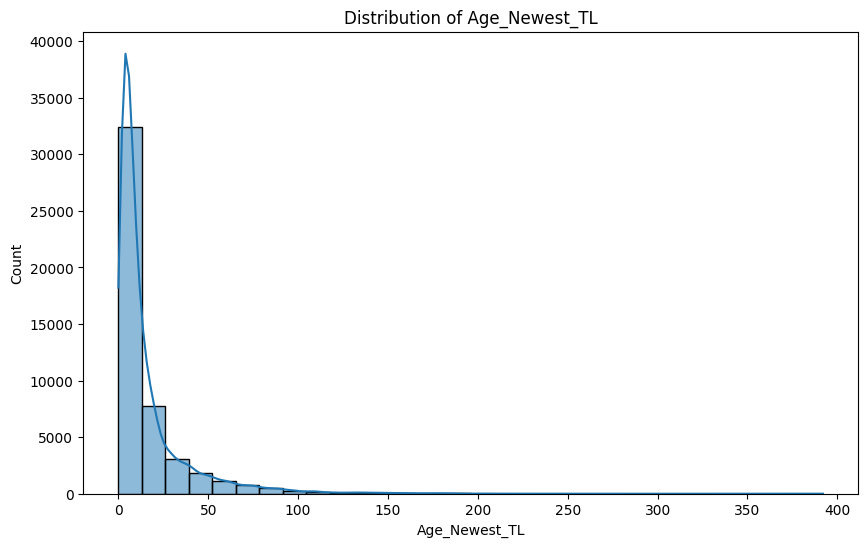

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(f_dataset['Age_Newest_TL'], bins=30, kde=True)
plt.title("Distribution of Age_Newest_TL")
plt.xlabel("Age_Newest_TL")
plt.ylabel("Count")
plt.show()

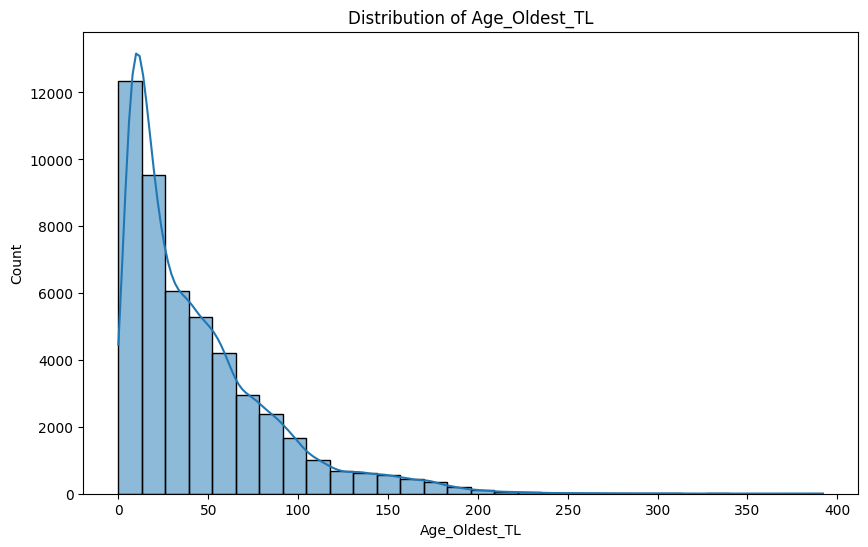

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(f_dataset['Age_Oldest_TL'], bins=30, kde=True)
plt.title("Distribution of Age_Oldest_TL")
plt.xlabel("Age_Oldest_TL")
plt.ylabel("Count")
plt.show()

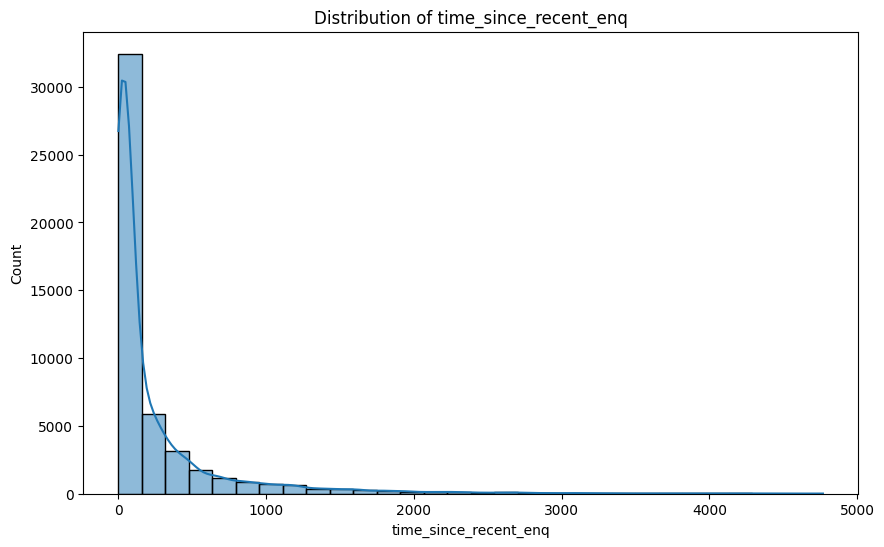

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(f_dataset['time_since_recent_enq'], bins=30, kde=True)
plt.title("Distribution of time_since_recent_enq")
plt.xlabel("time_since_recent_enq")
plt.ylabel("Count")
plt.show()

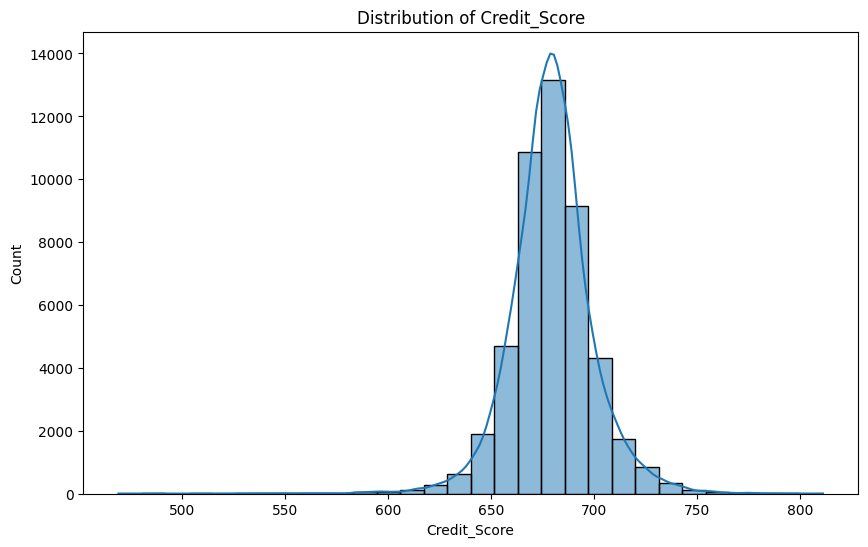

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(train_n['Credit_Score'], bins=30, kde=True)
plt.title("Distribution of Credit_Score")
plt.xlabel("Credit_Score")
plt.ylabel("Count")
plt.show()

C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\3797854709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=f_dataset, x='Approved_Flag', palette='Set2')


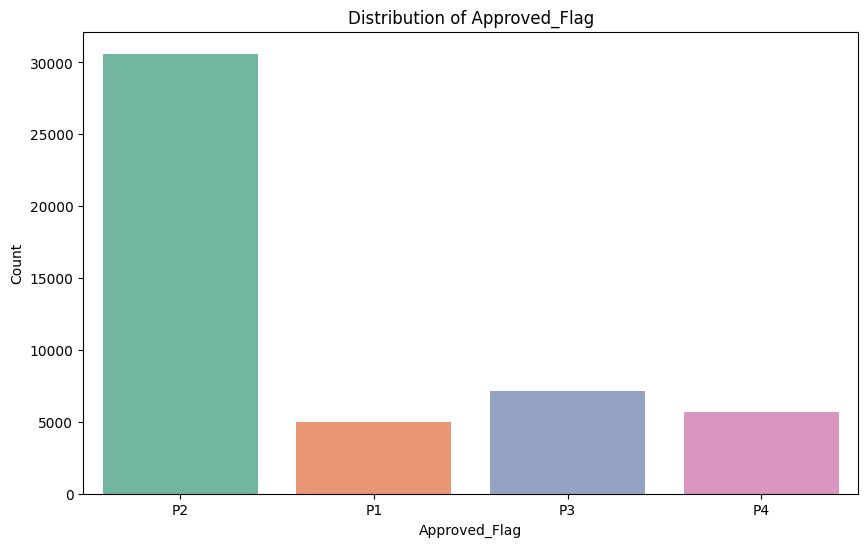

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=f_dataset, x='Approved_Flag', palette='Set2')
plt.title("Distribution of Approved_Flag")
plt.xlabel("Approved_Flag")
plt.ylabel("Count")
plt.show()

C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\4187641892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=f_dataset, x='first_prod_enq2', palette='Set2')


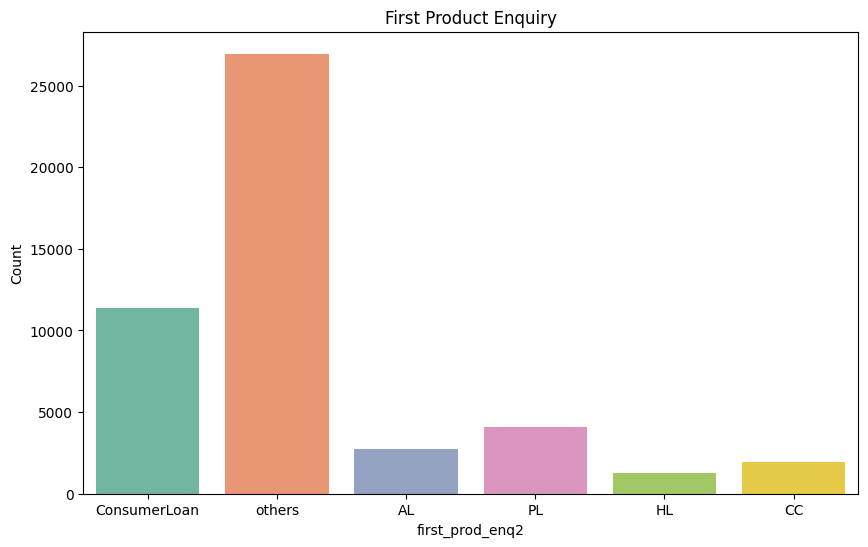

In [85]:

plt.figure(figsize=(10, 6))
sns.countplot(data=f_dataset, x='first_prod_enq2', palette='Set2')
plt.title("First Product Enquiry")
plt.xlabel("first_prod_enq2")
plt.ylabel("Count")
plt.show()

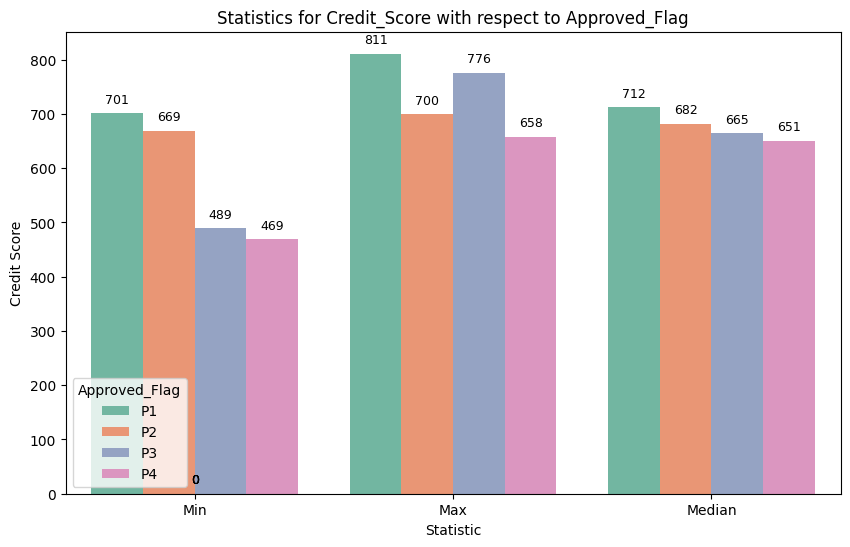

In [86]:
# Calculate min, max, median for each Approved_Flag
stats_df = train_n.groupby('Approved_Flag')['Credit_Score'].agg(
    Min='min',
    Max='max',
    Median='median'
).reset_index()

# Melt for plotting
stats_melted = stats_df.melt(id_vars='Approved_Flag', 
                              value_vars=['Min', 'Max', 'Median'], 
                              var_name='Statistic', 
                              value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=stats_melted, x='Statistic', y='Value', hue='Approved_Flag', palette='Set2')

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title("Statistics for Credit_Score with respect to Approved_Flag")
plt.xlabel("Statistic")
plt.ylabel("Credit Score")
plt.legend(title='Approved_Flag')
plt.show()

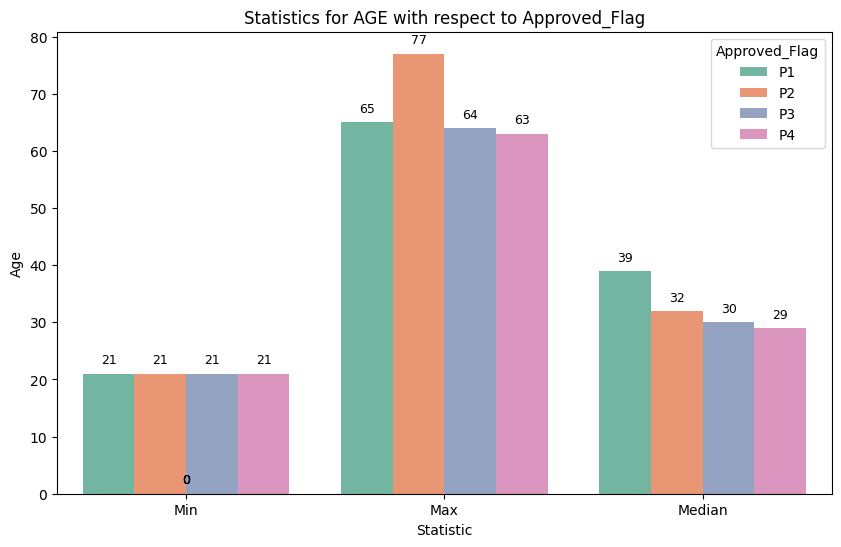

In [87]:
# Calculate min, max, median for each Approved_Flag
stats_df = train_n.groupby('Approved_Flag')['AGE'].agg(
    Min='min',
    Max='max',
    Median='median'
).reset_index()

# Melt for plotting
stats_melted = stats_df.melt(id_vars='Approved_Flag', 
                              value_vars=['Min', 'Max', 'Median'], 
                              var_name='Statistic', 
                              value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=stats_melted, x='Statistic', y='Value', hue='Approved_Flag', palette='Set2')

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title("Statistics for AGE with respect to Approved_Flag")
plt.xlabel("Statistic")
plt.ylabel("Age")
plt.legend(title='Approved_Flag')
plt.show()

In [88]:
df = f_dataset.copy()

In [89]:
!pip install xgboost


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

**Without Credit Score**

In [91]:
X = df[[
  'Age_Newest_TL', 'Age_Oldest_TL', 'CC_enq_L12m', 'CC_Flag', 'CC_TL', 'EDUCATION',
  'first_prod_enq2', 'GENDER', 'GL_Flag', 'HL_Flag', 'Home_TL', 'last_prod_enq2', 'MARITALSTATUS',
  'max_recent_level_of_deliq', 'NETMONTHLYINCOME', 'num_dbt_12mts', 'num_dbt', 'num_deliq_6_12mts',
  'num_lss', 'num_std_12mts', 'num_sub_12mts', 'num_sub_6mts', 'num_sub', 'num_times_60p_dpd',
  'pct_CC_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_ever', 'pct_tl_closed_L12M', 'pct_tl_closed_L6M',
  'pct_tl_open_L6M', 'PL_enq_L12m', 'PL_Flag', 'PL_TL', 'recent_level_of_deliq', 'Secured_TL',
  'time_since_recent_enq', 'time_since_recent_payment', 'Time_With_Curr_Empr', 'Tot_Missed_Pmnt',
  'Tot_TL_closed_L12M', 'Unsecured_TL', 'enq_L3m', 'Other_TL'
]]

# Target: what you want to predict
y = df['Approved_Flag']  # 0 or 1

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # save encoder if needed for inverse transform later

# Encode target if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\3611822509.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\3611822509.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\3611822509.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Random Forest Accuracy: 0.7828512396694215


C:\All Data\Projects\Credit-Risk-Assessment-Using-Probability-and-Statistics\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:09:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7889462809917356


In [97]:
X = df[[
  'Age_Newest_TL', 'Age_Oldest_TL', 'CC_enq_L12m', 'CC_Flag', 'CC_TL', 'EDUCATION',
  'first_prod_enq2', 'GENDER', 'GL_Flag', 'HL_Flag', 'Home_TL', 'last_prod_enq2', 'MARITALSTATUS',
  'max_recent_level_of_deliq', 'NETMONTHLYINCOME', 'num_dbt_12mts', 'num_dbt', 'num_deliq_6_12mts',
  'num_lss', 'num_std_12mts', 'num_sub_12mts', 'num_sub_6mts', 'num_sub', 'num_times_60p_dpd',
  'pct_CC_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_ever', 'pct_tl_closed_L12M', 'pct_tl_closed_L6M',
  'pct_tl_open_L6M', 'PL_enq_L12m', 'PL_Flag', 'PL_TL', 'recent_level_of_deliq', 'Secured_TL',
  'time_since_recent_enq', 'time_since_recent_payment', 'Time_With_Curr_Empr', 'Tot_Missed_Pmnt',
  'Tot_TL_closed_L12M', 'Unsecured_TL', 'enq_L3m', 'Other_TL','Credit_Score'
]]

# Target: what you want to predict
y = df['Approved_Flag']  # 0 or 1

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # save encoder if needed for inverse transform later

# Encode target if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\2535427785.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\2535427785.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\sayali patil\AppData\Local\Temp\ipykernel_14764\2535427785.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Random Forest Accuracy: 0.9917355371900827


C:\All Data\Projects\Credit-Risk-Assessment-Using-Probability-and-Statistics\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:13:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9950413223140496


### XGBoost Model

In [93]:
!pip install scikit-optimize


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [95]:
X = df[[
  'Age_Newest_TL', 'Age_Oldest_TL', 'CC_enq_L12m', 'CC_Flag', 'CC_TL', 'EDUCATION',
  'first_prod_enq2', 'GENDER', 'GL_Flag', 'HL_Flag', 'Home_TL', 'last_prod_enq2', 'MARITALSTATUS',
  'max_recent_level_of_deliq', 'NETMONTHLYINCOME', 'num_dbt_12mts', 'num_dbt', 'num_deliq_6_12mts',
  'num_lss', 'num_std_12mts', 'num_sub_12mts', 'num_sub_6mts', 'num_sub', 'num_times_60p_dpd',
  'pct_CC_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_ever', 'pct_tl_closed_L12M', 'pct_tl_closed_L6M',
  'pct_tl_open_L6M', 'PL_enq_L12m', 'PL_Flag', 'PL_TL', 'recent_level_of_deliq', 'Secured_TL',
  'time_since_recent_enq', 'time_since_recent_payment', 'Time_With_Curr_Empr', 'Tot_Missed_Pmnt',
  'Tot_TL_closed_L12M', 'Unsecured_TL', 'enq_L3m', 'Other_TL','Credit_Score'
]]

# Target: what you want to predict
y = df['Approved_Flag']  # 0 or 1X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter search space
param_space = {
    'n_estimators': Integer(100, 300),       # fewer trees to reduce computation
    'max_depth': Integer(3, 10),             # shallow trees to prevent overfitting
    'learning_rate': Real(0.01, 0.1, 'log-uniform'),  # slower learning, better generalization
    'subsample': Real(0.7, 1.0),             # use 70-100% of rows per tree
    'colsample_bytree': Real(0.7, 1.0),      # use 70-100% of columns per tree
    'reg_alpha': Real(0, 5),                 # L1 regularization
    'reg_lambda': Real(0, 5)
}

# Setup BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=15,       
    cv=3,            # Cross-validation folds
    scoring='roc_auc_ovr',
    n_jobs=-1,
    random_state=42
)

# Fit on training data
bayes_search.fit(X_train, y_train)

C:\All Data\Projects\Credit-Risk-Assessment-Using-Probability-and-Statistics\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:11:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,search_spaces,"{'colsample_bytree': Real(low=0.7,...m='normalize'), 'learning_rate': Real(low=0.01...m='normalize'), 'max_depth': Integer(low=3...m='normalize'), 'n_estimators': Integer(low=1...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,15
,scoring,'roc_auc_ovr'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [101]:
# Get best model from BayesSearchCV
model = bayes_search.best_estimator_

# User input (only 8 values)
user_input = {
    'Age_Newest_TL': 24,
    'Age_Oldest_TL': 60,
    'EDUCATION': 2,    # Bachelor's
    'GENDER': 1,       # Male
    'MARITALSTATUS': 0, # Single
    'NETMONTHLYINCOME': 45000,
    'Time_With_Curr_Empr': 36,  # months
    'Credit_Score': 720
}

# Fill missing columns with defaults
defaults = {col: 0 for col in X_train.columns if col not in user_input}
full_input = {**defaults, **user_input}

# Make sure DataFrame has same column order as training
input_df = pd.DataFrame([full_input])[X_train.columns]

# Predict class
pred = best_model.predict(input_df)
print("Predicted Risk Category:", pred[0])

# Predict probabilities (confidence)
proba = best_model.predict_proba(input_df)
print("Class Probabilities:", proba)

Predicted Risk Category: 0
Class Probabilities: [[9.9841928e-01 4.3926947e-04 9.3406159e-04 2.0738215e-04]]


**Save Model using Pickel**

In [100]:
import pickle

In [102]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

In [104]:
trained_columns = X_train.columns
with open("trained_columns.pkl", "wb") as f:
    pickle.dump(trained_columns, f)

In [103]:
with open("model.pkl", "rb") as file:
    loaded_model = pickle.load(file)